# Bussiness Understanding

### Problem Statement

Bank memiliki pendapatan dari bunga yang didapat dari pengguna kartu kredit. Sebagai data analyst, saya ditugaskan untuk menganalisis Tingkat pengeluaran kreditor pertahun dari banyaknya transaksi yang ada dalam setahun.

### Pertanyaan

1. Berapa banyak orang yang memiliki pendapatan lebih dari $120K?
2. Berapa pendapatan setiap orang berdasarkan tingkat pendidikan?
3. Apakah usia diatas 50 tahun kurang aktif dalam bertransaksi dibanding yang dibawahnya?
4. Berapa perbandingan antara banyaknya Kreditor yang Aktif dan Kreditor yang keluar?
5. Apakah Gender ada hubungannya dengan banyaknya transaksi?
6. Berapa rata-rata pengeluaran kreditor satu tahun ini untuk golongan Uneducated(tidak terdidik) setelah outliernya dibersihkan?

### SMART Statement

- **Specific**: Mengetahui kalangan mana yang akan diberikan promosi
- **Measurable**: Menghitung banyak kreditor yang memiliki pengeluaran dan pendapatan berdasarkan kalangan yang ditinjau
- **Achievable**: Menghubungkan total transaksi dengan tingkat pendidikan, umur, dan gender berdasarkan pendapatan masing-masing
- **Relevant**: Setelah diketahui, maka bank bisa mendapat target yang cocok untuk diberikan promosi
- **Time-Bound**: Data yang diolah didapat setelah 1 sampai 3 bulan pengerjaan

### Fokus Data

- **Attrition_Flag**(Internal event (customer activity) variable - if the account is closed then 1 else 0)
- **Customer_Age**(Customer's Age in Years)
- **Gender**(M=Male, F=Female)
- **Education_Level**
- **Income_Category**()
- **Total_Trans_Amt**(Total Transaction Amount (Last 12 months))
- **Total_Trans_Ct**(Total Transaction Count (Last 12 months))

# Data Loading

Link datasample: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

In [305]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import streamlit as st
import matplotlib.pyplot as plt

### Pengambilan data

In [306]:
database = pd.read_csv('BankChurners.csv')[pd.read_csv('BankChurners.csv').columns[0:19]]
deleted_col = [database.columns[4]]
deleted_col.extend(database.columns[8:17])
database.drop(columns=deleted_col,inplace=True)
database.info()
database.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CLIENTNUM        10127 non-null  int64 
 1   Attrition_Flag   10127 non-null  object
 2   Customer_Age     10127 non-null  int64 
 3   Gender           10127 non-null  object
 4   Education_Level  10127 non-null  object
 5   Marital_Status   10127 non-null  object
 6   Income_Category  10127 non-null  object
 7   Total_Trans_Amt  10127 non-null  int64 
 8   Total_Trans_Ct   10127 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 712.2+ KB


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Existing Customer,45,M,High School,Married,$60K - $80K,1144,42
1,818770008,Existing Customer,49,F,Graduate,Single,Less than $40K,1291,33
2,713982108,Existing Customer,51,M,Graduate,Married,$80K - $120K,1887,20
3,769911858,Existing Customer,40,F,High School,Unknown,Less than $40K,1171,20
4,709106358,Existing Customer,40,M,Uneducated,Married,$60K - $80K,816,28


Data tidak memiliki nilai null dan memiliki 8 kolom dan 10127 baris

### Menyimpan data yang akan diproses ke variable lain

In [307]:
datawork = database.copy()
datawork.info()
datawork.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CLIENTNUM        10127 non-null  int64 
 1   Attrition_Flag   10127 non-null  object
 2   Customer_Age     10127 non-null  int64 
 3   Gender           10127 non-null  object
 4   Education_Level  10127 non-null  object
 5   Marital_Status   10127 non-null  object
 6   Income_Category  10127 non-null  object
 7   Total_Trans_Amt  10127 non-null  int64 
 8   Total_Trans_Ct   10127 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 712.2+ KB


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Existing Customer,45,M,High School,Married,$60K - $80K,1144,42
1,818770008,Existing Customer,49,F,Graduate,Single,Less than $40K,1291,33
2,713982108,Existing Customer,51,M,Graduate,Married,$80K - $120K,1887,20
3,769911858,Existing Customer,40,F,High School,Unknown,Less than $40K,1171,20
4,709106358,Existing Customer,40,M,Uneducated,Married,$60K - $80K,816,28


# Data Cleaning

### Format CLIENTNUM menjadi string

In [308]:
datawork['CLIENTNUM'] = datawork['CLIENTNUM'].astype(str) 
datawork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CLIENTNUM        10127 non-null  object
 1   Attrition_Flag   10127 non-null  object
 2   Customer_Age     10127 non-null  int64 
 3   Gender           10127 non-null  object
 4   Education_Level  10127 non-null  object
 5   Marital_Status   10127 non-null  object
 6   Income_Category  10127 non-null  object
 7   Total_Trans_Amt  10127 non-null  int64 
 8   Total_Trans_Ct   10127 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 712.2+ KB


### Penambahan data Total_Trans

In [309]:
datawork['Total_Trans'] = datawork['Total_Trans_Amt'] * datawork['Total_Trans_Ct']
datawork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CLIENTNUM        10127 non-null  object
 1   Attrition_Flag   10127 non-null  object
 2   Customer_Age     10127 non-null  int64 
 3   Gender           10127 non-null  object
 4   Education_Level  10127 non-null  object
 5   Marital_Status   10127 non-null  object
 6   Income_Category  10127 non-null  object
 7   Total_Trans_Amt  10127 non-null  int64 
 8   Total_Trans_Ct   10127 non-null  int64 
 9   Total_Trans      10127 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 791.3+ KB


# Visualisasi Data

### Penampilan informasi data

In [310]:
datawork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CLIENTNUM        10127 non-null  object
 1   Attrition_Flag   10127 non-null  object
 2   Customer_Age     10127 non-null  int64 
 3   Gender           10127 non-null  object
 4   Education_Level  10127 non-null  object
 5   Marital_Status   10127 non-null  object
 6   Income_Category  10127 non-null  object
 7   Total_Trans_Amt  10127 non-null  int64 
 8   Total_Trans_Ct   10127 non-null  int64 
 9   Total_Trans      10127 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 791.3+ KB


### Menvisualisasikan Banyaknya kreditor berdasarkan Income_Category

#### Mengetahui banyak orang yang memiliki pendapatan lebih dari $120K

In [311]:
data = datawork.query("Income_Category == '$120K +'")['Income_Category'].count()
data

727

Dari sini bisa diketahui bahwa banyak kreditor yang memiliki pendapatan lebih dari $120K ada 727 kreditor

#### Visualisasi Data

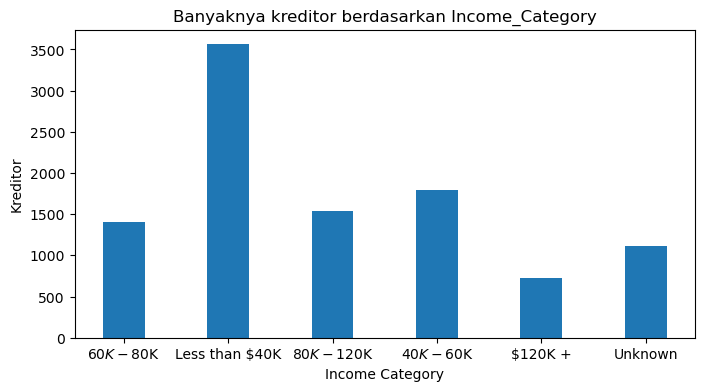

In [312]:
# # plt.plot(datawork.groupby('Income_Category')['CLIENTNUM'].count())
# fig, axes = plt.subplots(ncols=1,figsize=(8,4))
# axes.bar(['Income_Category','Populasi'],datawork.groupby('Income_Category')['CLIENTNUM'].count().values(),width=0.4)
# axes.set_title('Banyaknya populasi berdasarkan Income_Category')

# plt.show()

column = datawork['Income_Category'].unique()
value = datawork.groupby('Income_Category')['CLIENTNUM'].count()
value = [value[i] for i in column]

fig, axes = plt.subplots(ncols=1,figsize=(8,4))
axes.bar(column,value,width=0.4)
axes.set_title('Banyaknya kreditor berdasarkan Income_Category')
axes.set_xlabel('Income Category')
axes.set_ylabel('Kreditor')

plt.show()

Dan Dari data ini, didapat bahwa Kreditor yang memiliki pendapatan kurang dari $40K lebih banyak dibanding kreditor yang memiliki pendapatan $120K +

### Visualisasi pendapatan berdasarkan tingkat pendidikan

c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

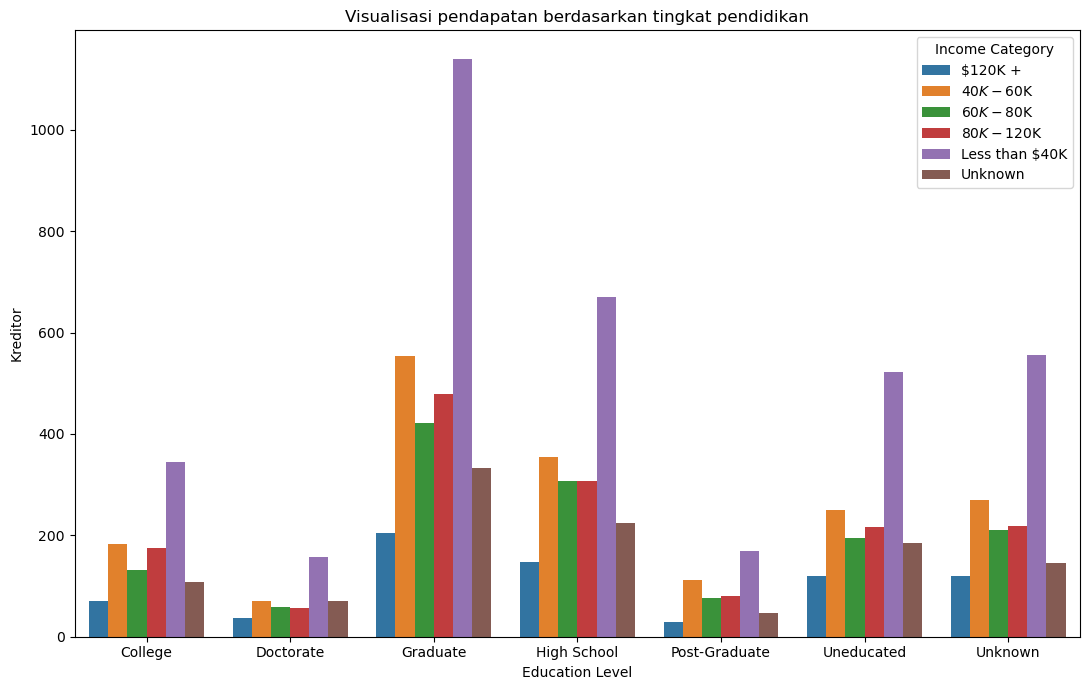

In [313]:
# Mengambil data yang diperlukan
data_graph = datawork.groupby(['Education_Level', 'Income_Category'])['Income_Category'].count().reset_index(name='Kreditor')

# Menginisialisasikan plot
fig, axis = plt.subplots(figsize=(11,7))

#Membuat graphis berdasarkan banyaknya Income Category
sns.barplot(x='Education_Level', y='Kreditor', hue='Income_Category',data=data_graph,ax=axis)

#Membuat Judul dan Label untuk X dan Y
axis.set_xlabel('Education Level')
axis.set_ylabel('Kreditor')
axis.set_title('Visualisasi pendapatan berdasarkan tingkat pendidikan')

#Mengatur Legenda
axis.legend(title="Income Category",loc='upper right')

plt.tight_layout()
plt.show()

data_graph.to_csv('pendapatan berdasarkan tingkat pendidikan.csv',index=False)

# fig, axes = plt.subplots(figsize=(10, 6))

# education_levels = data_graph['Education_Level'].unique()
# n_education_levels = len(education_levels)
# bar_width = 0.15  # Width of each bar

# x = np.arange(len(education_levels))

# # Iterate over unique income categories
# for i, income_category in enumerate(data_graph['Income_Category'].unique()):
#     subset = data_graph[data_graph['Income_Category'] == income_category]
#     populasi = subset['Populasi'].values
#     bars = axes.bar(x + i * bar_width, populasi, bar_width, color=color[i], label=income_category)

# axes.set_xlabel('Education Level')
# axes.set_ylabel('Populasi')
# axes.set_title('Visualisasi pendapatan berdasarkan tingkat pendidikan')
# axes.set_xticks(x + bar_width * (n_education_levels - 1) / 2)
# axes.set_xticklabels(education_levels)
# axes.legend(title='Income Category', loc='upper right')

# plt.tight_layout()
# plt.show()

# fig, axes = plt.subplots(ncols=1,figsize=(8,4))
# axes.bar(column,value,width=0.4)
# axes.set_title('Banyaknya populasi berdasarkan Income_Category')
# axes.set_xlabel('Income_Category')
# axes.set_ylabel('Education_Level')

# plt.show()


Dari sini, bisa ditarik kesimpulan bahwa Kreditor lebih banyak di tingkat pendidikan **Graduate** diikuti dengan **Lulusan SMA** dengan Pendapatan kurang dari $40K

### Visualisasi Banyaknya Transaksi berdasarkan umur

c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

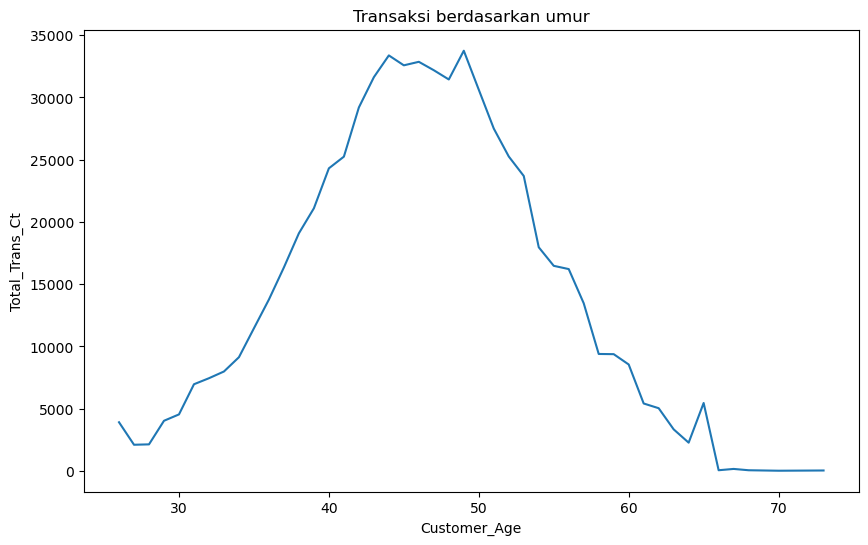

In [314]:
#Mendapat data
data_graph = datawork[['Customer_Age','Total_Trans_Ct']].copy().sort_values(by='Customer_Age')
data_graph = data_graph.groupby('Customer_Age')['Total_Trans_Ct'].sum().reset_index(name='Total_Trans_Ct')

#Pembuatan Grafis
plt.figure(figsize=(10, 6))

# Use Seaborn to create the line plot
sns.lineplot(x='Customer_Age', y='Total_Trans_Ct', data=data_graph)

# Set labels and title
plt.xlabel('Customer_Age')
plt.ylabel('Total_Trans_Ct')
plt.title('Transaksi berdasarkan umur')
plt.show()

data_graph.to_csv('Transaksi berdasarkan umur.csv',index=False)

# fig, ax = plt.subplots(figsize=(20,5))


Dari sini, dapat ditarik kesimpulan bahwa puncak banyaknya transaksi tertinggi ada di antara umur 40 sampai 50 tahun dan banyaknya transaksi mengalami penurunan pada usia 50 tahun keatas

### Memvisualisasikan perbandingan antara Kreditor yang Aktif dan Kreditor yang telah ditutup

#### Menghitung perbandingan antara Kreditor yang Aktif dan Kreditor yang telah ditutup

c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


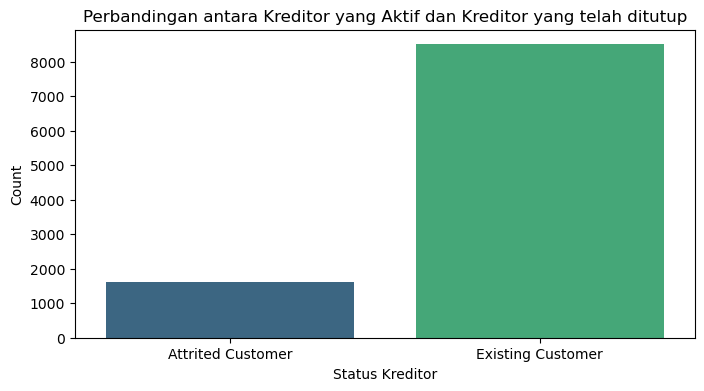

In [315]:
data_graph = datawork.groupby(['Attrition_Flag'])['Attrition_Flag'].count().reset_index(name='Count')

plt.figure(figsize=(8, 4))

# Create a bar plot with Seaborn
sns.barplot(x='Attrition_Flag', y='Count', data=data_graph, palette="viridis")

plt.title('Perbandingan antara Kreditor yang Aktif dan Kreditor yang telah ditutup')
plt.xlabel('Status Kreditor')
plt.ylabel('Count')

plt.show()

data_graph.to_csv('Status Kreditor.csv',index=False)

Dari graphis tersebut, didapatkan bahwa kreditor keluar lebih sedikit dari kreditor yang masih aktif

# Menganalisa Data

### Menganalisa hubungan antara gender dengan banyaknya transaksi yang dilakukan

##### Hipotesis

Case: Hubungan Antara gender dengan banyaknya transaksi

- H0: Tidak ada Hubungan antara gender dengan banyaknya transaksi yang dilakukan
- H1: Adanya Hubungan antara gender dengan banyaknya transaksi yang dilakukan 

In [316]:
datawork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CLIENTNUM        10127 non-null  object
 1   Attrition_Flag   10127 non-null  object
 2   Customer_Age     10127 non-null  int64 
 3   Gender           10127 non-null  object
 4   Education_Level  10127 non-null  object
 5   Marital_Status   10127 non-null  object
 6   Income_Category  10127 non-null  object
 7   Total_Trans_Amt  10127 non-null  int64 
 8   Total_Trans_Ct   10127 non-null  int64 
 9   Total_Trans      10127 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 791.3+ KB


In [317]:
analys = datawork[['CLIENTNUM','Gender','Total_Trans_Ct']]
analys.head()

,CLIENTNUM,Gender,Total_Trans_Ct
0,768805383,M,42
1,818770008,F,33
2,713982108,M,20
3,769911858,F,20
4,709106358,M,28


In [318]:
crosstab = pd.crosstab(analys['Total_Trans_Ct'],analys['Gender'])
res = stats.chi2_contingency(crosstab)
print('p-value:%s'%(res.pvalue))

p-value:1.2315934300257103e-34


Dari sini dikatakan bahwa p-value > 0.05 dengan p-value=1.2315934300257103e-34, maka bisa dikatakan bahwa banyaknya transaksi tidak ada hubungannya dengan gender

### Menganalisa potensi pengeluaran kreditor dalam golongan tidak terdidik(Uneducated) 

#### Data Loading

In [319]:
data = datawork.query("Education_Level == 'Uneducated'").copy()
data['Total_Trans'] = data['Total_Trans_Amt'] * data['Total_Trans_Ct']
data = data[['Education_Level','Total_Trans']].copy()
data

,Education_Level,Total_Trans
4,Uneducated,22848
8,Uneducated,32400
10,Uneducated,50442
28,Uneducated,18936
31,Uneducated,41496
...,...,...
10083,Uneducated,1765455
10085,Uneducated,2001287
10102,Uneducated,2054838
10115,Uneducated,1812452


### Pencarian Central Tendency

In [320]:
# Membuat tabel modus
mode = pd.DataFrame([datawork[['Total_Trans_Amt','Total_Trans_Ct','Total_Trans']].mode().iloc[0]])

# Mengganti index pertama menjadi mode
mode = mode.rename(index={0:'mode'})

# Membuat tabel rata-rata
mean = {'Total_Trans_Amt':[datawork['Total_Trans_Amt'].mean()],
        'Total_Trans_Ct':[datawork['Total_Trans_Ct'].mean()],
        'Total_Trans':[datawork['Total_Trans'].mean()]}
mean = pd.DataFrame(mean)

# Mengganti nama baris menjadi mean
mean = mean.rename(index={0:'mean'})

# Membuat tabel median
median = {'Total_Trans_Amt':[datawork['Total_Trans_Amt'].median()],
        'Total_Trans_Ct':[datawork['Total_Trans_Ct'].median()],
        'Total_Trans':[datawork['Total_Trans'].median()]}
median = pd.DataFrame(median)

# Mengganti nama baris menjadi median
median = median.rename(index={0:'median'})

# Menggabungkan data dan menampilkannya
basicStatTable = pd.concat([mode,median,mean],ignore_index=False)
basicStatTable

,Total_Trans_Amt,Total_Trans_Ct,Total_Trans
mode,4253.000000,81.000000,35154.0000
median,3899.000000,67.000000,268840.0000
mean,4404.086304,64.858695,350001.9055


#### Pencarian Skewness dan Kurtosis

In [321]:
skewness = data['Total_Trans'].skew()
kurtosis = data['Total_Trans'].kurtosis()
print("""
      skewness: %s
      kurtosis:%s"""%(skewness,kurtosis))


      skewness: 2.405768643379616
      kurtosis:5.488915604300903


#### Pembersihan Outlier

In [322]:
# Mengambil data quartil 1 dan 3
q1 = data['Total_Trans'].quantile(0.25)
q3 = data['Total_Trans'].quantile(0.75)
iqr = q3-q1
# Mencari lower Bound dan Upper Bound
upperBound = q3 + 1.5*iqr
lowerBound = q3 - 1.5*iqr

databersih = data.query('Total_Trans > %s and Total_Trans < %s'%(lowerBound,upperBound))
databersih

,Education_Level,Total_Trans
4,Uneducated,22848
8,Uneducated,32400
10,Uneducated,50442
28,Uneducated,18936
31,Uneducated,41496
...,...,...
9996,Uneducated,777345
10006,Uneducated,774162
10050,Uneducated,608124
10067,Uneducated,660330


#### Normal Test

In [323]:
stats.normaltest(databersih['Total_Trans']).pvalue

3.4325147242022964e-32

p-value > 0.05 jadi datanya normal

#### Pencarian Potensi Pengeluaran

In [324]:
std = databersih['Total_Trans'].std()
N = len(databersih['Total_Trans'])
lowerBound, upperBound = stats.norm.interval(0.95,loc=databersih['Total_Trans'].mean(),scale=std/np.sqrt(N))

print("""
      lowerBound pengeluaran: %s
      
      upperBound pengeluaran: %s
      """%(
          round(lowerBound), round(upperBound)
          ))


      lowerBound pengeluaran: 237659
      
      upperBound pengeluaran: 256160
      


Potensi pengeluaran kreditor berkisar antara 237659 sampai 256160

# Kesimpulan

1. Banyak kreditor yang memiliki pendapatan lebih dari $120K ada 727 kreditor
2. Kreditor yang memiliki pendapatan kurang dari $40K lebih banyak dibanding kreditor yang memiliki pendapatan $120K +
3. Kreditor lebih banyak di tingkat pendidikan **Graduate** diikuti dengan **Lulusan SMA** dengan Pendapatan kurang dari $40K
4. Puncak banyaknya transaksi tertinggi ada di antara umur 40 sampai 50 tahun dan banyaknya transaksi mengalami penurunan pada usia 50 tahun keatas
5. Dalam satu tahun, ada setidaknya 1000+ kreditor yang menutup akunnya
6. Banyaknya transaksi tidak ada hubungannya dengan gender
7. Potensi pengeluaran kreditor berkisar antara 237659 sampai 256160